In [1]:
display("Adding style properties to notebook")
from IPython.core.display import HTML
HTML("""<style>div {font-family:Open Sans,sans-serif;}h1 {color:white;background-color: #446a7f;padding:10px}h2{color:black; background-color:#b3b6a0; padding:10px}h3{color:#78BE21; background-color:#446a7f; padding:10px}h4{color:white; background-color:#78BE21;padding:5px}.info{background-color:}

img {border: 3px solid #446a7f;}</style>""")

'Adding style properties to notebook'


<h1>Enriching Collections Data with Data Reconciliation and Linked Art</h1>

The Linked Art reconciliation exemplar provides a step through the process of reconciling geographical place names that occur in the title of artworks by the artist, John Ruskin, to enrich collections data with an additional representation of the geographical coordinates of the place depicted in the artworks. 

From Wikipedia:

<blockquote>"John Ruskin (8 February 1819 – 20 January 1900) was an English writer, philosopher, art critic and polymath of the Victorian era. He wrote on subjects as varied as geology, architecture, myth, ornithology, literature, education, botany and political economy."</blockquote>

John Ruskin travelled extensively in Europe and was a prolific artist, creating drawings of paintings whose titles often included place names for the locations depicted. 

#### Artwork Title contains Place Name
The title of the artworks has been recorded in the title field in many of the collection data records , and this has been used as the basis for the reconciliation process shown here.

#### OpenRefine Tool to Reconcile Data
The place names are reconciled with the <a href="https://www.getty.edu/research/tools/vocabularies/tgn/">Getty Thesaurus of Geographic Names (TGN)</a>, using the <a href="https://openrefine.org/">Open Refine</a> tool.

#### The Getty Thesaurus of Geographic Names (TGN)
Reconciliation with the <a href="https://www.getty.edu/research/tools/vocabularies/tgn/">Getty Thesaurus of Geographic Names (TGN)</a> has allowed additional information to be associated with the artwork: 
- an authoritative global identifier for the geographical location depicted 
- geographical coordinates

#### Input Data Files

The input files are Linked Art files created with the <a href="https://github.com/tgra/Linked-Art/blob/main/01-06-Transform-John-Ruskin.ipynb">`01-06-Transform-John-Ruskin`</a> Jupyter notebook.


### Further Reading

- The Getty Thesaurus of Geographic Names® Online (TGN) http://www.getty.edu/research/tools/vocabularies/tgn
- John Ruskin Wikipedia entry https://en.wikipedia.org/wiki/John_Ruskin



## Reconciliation Process

1. Create CSV file from Linked Art JSON-LD
2. Identify place name in title
3. Use OpenRefine to reconcile place names
4. Define geolocation representation in Linked Art
5. Add place name and coordinates into Linked Art JSON-LD files

## 1. Create CSV file from Linked Art JSON-LD

To reconcile the place names in the artwork titles
- create a CSV file from the JSON-LD Linked Art files
- CSV contains `id` and `_label` properties

The script gets a list of all files in a selected directory using `os.listdir()` and iterates over them.

- `json.load` is used to deserialize the Linked Art JSONLD file to a Python dictionary object. 
 - json.loads uses the following conversion table https://docs.python.org/3/library/json.html#json-to-py-table  

Finally, the script uses  `csv.DictWriter` 
- to create an object that maps the Python dictionary onto output rows. 
- `Dictwriter.writeheader()` writes a row with the field names (as specified in the constructor) to the writer’s file object. 
- `Dictwriter.writerows()` writes all elements in rows to the writer’s file object.


#### Further Reading
- os Python library https://docs.python.org/3/library/os.html
- os.listdir() tutorial https://www.tutorialspoint.com/python/os_listdir.htm
- json Python library https://docs.python.org/3/library/json.html
- csv Python library https://docs.python.org/3/library/csv.html

In [25]:
# import relevant Python libraries

try:
    import os
except:
    %pip install os
    import os

try:
    import json
except:
    %pip install json
    import json 
    
import csv

# list holding a
artworkCSV = []

# Linked Art JSON-LD file location
artworkFileDir = "./data/ruskin/output/json/"
artworkFileList =os.listdir(artworkFileDir)

# iterate over Linked Art JSON-LD files
for artworkFile in artworkFileList:
    # read file and append to 
    with open( artworkFileDir + artworkFile) as artworkFileContents:  
        
        # create json object `artwork` from file
        artworkObjJSON = json.load(artworkFileContents)
        
        # check for "_label" property 
        if "_label" not in artworkObjJSON:
            continue
            
        # append artwork properties to artwork JSON object
        artworkCSV.append( {      
            "id": artworkObjJSON["id"], 
            "place" : artworkObjJSON["_label"], 
            "place_modified": " ", 
            "coords": " "
            })

# end loop
        
        
# create CSV file
artworkCsvFile = "./data/ruskin/ruskin-places.csv" # file location

with open(artworkCsvFile, 'w') as f: 
    # write column headings
    w = csv.DictWriter(f, ["id","place","place_modified","coords"])
    w.writeheader()
    # write rows with artwork properties
    w.writerows(artworkCSV)

### Result - CSV File with Place Names

The contents of the resulting CSV file are shown below for illustration.

The CSV file is read into a `pandas` dataframe.  
<blockquote>`Pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. </blockquote>
  
  
A `pandas dataframe` is a pandas data structure containing 
<blockquote>two-dimensional, size-mutable, potentially heterogeneous tabular data.</blockquote>

The pandas dataframe allows easy manipulation of two-dimensional tabular data. 

The `IPython` library is also used to display the contents of the CSV file 
  
#### Further Reading  
- pandas  https://pandas.pydata.org/
- pandas dataframe https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
- IPython use in Jupyter notebooks https://coderzcolumn.com/tutorials/python/how-to-display-contents-of-different-types-in-jupyter-notebook-lab

In [26]:
try:
    import pandas as pd
except:
    %pip install pandas
    import pandas as pd

try:
    import IPython
except:
    %pip install IPython
    import IPython   
    
from IPython.display import display, HTML, Javascript

 # CSV file location
artworkCsvFile = "./data/ruskin/ruskin-places.csv"

# read CSV file into pandas dataframe 
dataFrame = pd.read_csv(artworkCsvFile,low_memory=False)

# define how many columns and rows to display == all
pd.options.display.max_columns = len(dataFrame.columns)
pd.options.display.max_rows = len(dataFrame.index)

# use IPython display to display the  contents of CSV file
display(dataFrame)

,id,place,place_modified,coords
0,https://collections.ashmolean.org/collection/1...,Engraving of Ruskin's Drawing of the Petal Vau...,,
1,https://collections.ashmolean.org/collection/1...,Enlarged Study of a Prawn's Rostrum,,
2,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,,
3,https://collections.ashmolean.org/collection/1...,"Autumnal Cloud filling the Valley of Geneva, t...",,
4,https://collections.ashmolean.org/collection/1...,Axmouth Landslip from Dolands Farm,,
5,https://collections.ashmolean.org/collection/1...,Drawing of Luini's fresco of 'Saint Catherine ...,,
6,https://collections.ashmolean.org/collection/1...,First Shoots of Wild Rose in Spring,,
7,https://www.harvardartmuseums.org/collections/...,"Tom Tower, Christ Church, Oxford",,
8,https://collections.ashmolean.org/collection/1...,"Growing Shoot of Mock Privet (Phillyrea), seen...",,
9,https://collections.ashmolean.org/collection/1...,An Exercise on the Outline of a common Snail-S...,,


## 2. Identify Place Names in Title

Next, get place name from artwork title
- extract possible place names from the artwork title field, to help with the reconciliation process. 
- a list of possible place names is used to help identify place names in the field. 
- add extracted place names to `place_modified` column 
- update CSV file

A list of place names `placeNames` is created to help with extracting place names from the artwork title. This was produced further to a review of the values in the place column.




In [27]:
artworkCsvFile = "./data/ruskin/ruskin-places.csv" # file location


# read CSV file into pandas dataframe
dataFrame = pd.read_csv(artworkCsvFile,low_memory=False)


# A list of place names `placeNames` is created to help with extracting place names from the artwork title.
placeNames = [
"Florence","Bologna","Lucca","Alps","Oxford","Rome",  "Venice","Fribourg","Neuchâtel","Sestri","Visp","Chamonix",
"Abbeville","Schaffhausen","Verona","Vorarlberg","Baden","Schaffhausen","Faido","Normandy","Genève","Geneva",
"Gloucester","Basel","Luzern","Padua","Habsburg","Rhine","Zug","Aix-la-Chapelle","Siena","Mont Blanc","Lago di Como",
"Bellinzona","Lake of Lecco"
]

places = {"Venezia":["Venice","Venetian","St Mark","St. Mark"]}


# iterate over dataframe
for index,row in dataFrame.iterrows():
    
    # iterate over place names
    # check if any place name in placesNames is present in row
    for place in placeNames:
        # if place name found, add to place_modified column
        if place in row["place"]:
            dataFrame.at[index,"place_modified"] = place
    
    # iterate over place names for Venice
    for place in places["Venezia"]:
        # if place found add `Venezia` to place_modified column
        if place in row["place"]:
            dataFrame.at[index,"place_modified"] = "Venezia"

            
# remove records where place_modified is blank
dataFrame = dataFrame[dataFrame.place_modified != " "]
dataFrame.to_csv(artworkCsvFile, index=False) 


### Result - CSV File containing Place Name for use in OpenRefine

The result of this process is a CSV file with the column `place_modified` containing a place name string that will be used for reconciliation in the OpenRefine tool.

Records where a place name has not be identified have been removed from the CSV file.

In [28]:
artworkCsvFile = "./data/ruskin/ruskin-places.csv" # file location

dataFrame = pd.read_csv(artworkCsvFile,low_memory=False)

# display table for illustration
display(dataFrame)

,id,place,place_modified,coords
0,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,Venezia,
1,https://collections.ashmolean.org/collection/1...,"Autumnal Cloud filling the Valley of Geneva, t...",Geneva,
2,https://www.harvardartmuseums.org/collections/...,"Tom Tower, Christ Church, Oxford",Oxford,
3,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,Venezia,
4,https://www.tate.org.uk/art/artworks/13033,View of Bologna,Bologna,
5,https://www.harvardartmuseums.org/collections/...,Fragment of the Alps,Alps,
6,https://www.harvardartmuseums.org/collections/...,Looking down from Florence towards Lucca,Lucca,
7,https://collections.ashmolean.org/collection/1...,Study of a Lion Cub from Nicola Pisano's Siena...,Siena,
8,https://www.harvardartmuseums.org/collections/...,"Entrance to Feldkirch, the Vorarlberg",Vorarlberg,
9,https://collections.ashmolean.org/collection//...,End of the Lake of Lecco,Lake of Lecco,


## 3. Use OpenRefine to Reconcile Place Names

Next
- use OpenRefine to match the values in the place_modified field, with place names in the name authority, The Getty Thesaurus of Geographic Names® Online (TGN).

`OpenRefine` is a tool for working with messy data, and includes support for reconciliation with external data such as name authorities.

`The Getty Thesaurus of Geographic Names® Online (TGN)` is one of several Getty Vocabularies that provide a structured resource that can be used to improve access to information about art, architecture, and material culture. From the website:

<blockquote>Through rich metadata and links, the Getty Vocabularies provide powerful conduits for knowledge creation, research, and discovery for digital art history and related disciplines.

TGN is a thesaurus. TGN is not a geographic information system (GIS), although it may be linked to existing major, general-purpose, geographic databases and maps. While most records in TGN include coordinates, these coordinates are approximate and are intended for reference ("finding purposes") only (as is true of coordinates in most atlases and other resources, including NGA (formerly NIMA) databases).

</blockquote>


#### Further Reading

- OpenRefine https://openrefine.org/
- The Getty Thesaurus of Geographic Names® Online (TGN) http://www.getty.edu/research/tools/vocabularies/tgn

In [29]:
from IPython.display import IFrame, HTML

display(HTML("<h4>Open Refine Website</h4>"))

display(IFrame('https://openrefine.org/documentation.html', '100%', '600px'))

### Method
    
The method used to reconcile the place names is as follows:
- Download and install OpenRefine https://openrefine.org/download.html
- Open OpenRefine and create a project
- Upload the places CSV file
- Reconcile place names in `place_modified`
- Choose the TGN service to reconcile data with
- Review Reconciliation Search Results
- Add a Column Containing Entity TGN Identifiers further to Reconciliation Process
- Manual Reconciliation

#### Further Reading
- OpenRefine https://openrefine.org


### Download and Install OpenRefine

- Download OpenRefine at https://openrefine.org/download.html
- Installation instructions at https://docs.openrefine.org/manual/installing

### Open OpenRefine and Create a Project

The following video illustrates how to create a project in OpenRefine using a CSV file on the local drive.

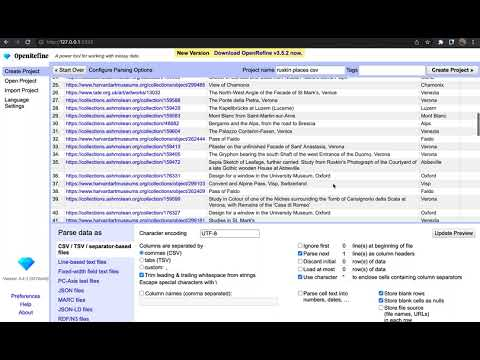

In [30]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Create Project</h4>"))


# video of project creation in OpenRefine

YouTubeVideo('h1aLc5uvdck', width=1024, height=576)

### Reconcile Place Names in `place_modified`

- Right-click on `place_modified` column header
- Select `Start reconciling`

<img width="800px" src="docs/media/img/openrefine2.png"/>

### Choose the TGN Service to Reconcile Data With

- Choose the Getty Voculabary Reconciliation Service that includes the TGN 

The video shows the following process:
- select a column to reconcile 
- select a service to reconcile with
- review options
- start reconciliation

#### Further Reading 
- Reconciliation services known to Wikidata - https://reconciliation-api.github.io/testbench/
- TGN https://www.getty.edu/research/tools/vocabularies/tgn/

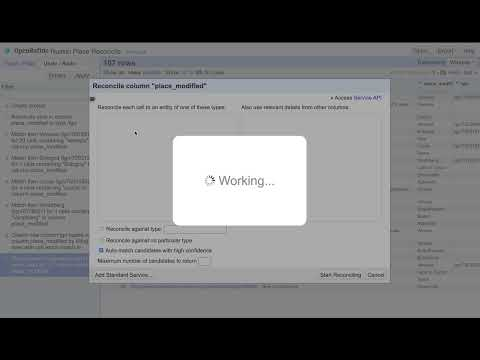

In [31]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Start Reconciliation</h4>"))


YouTubeVideo('Zm0woMobjpI', width=1024, height=576)



### Review Reconciliation Search Results

Once the reconciliation process has completed it is necessary to review the results. Using the TGN it is noticeable that there are many places in the United States of America that have the same names as locations in Italy. 

A review of each match is necessary. Once a correct match has been identified, this match can be applied to all cells with the same place name. 

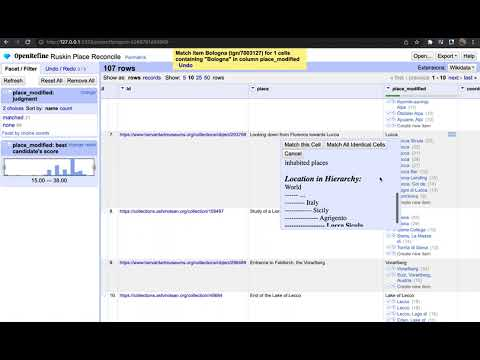

In [32]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Review Reconciliation Results</h4>"))

YouTubeVideo('pT0b0vsPRJ0', width=1024, height=576)




### Add a Column Containing Entity TGN Identifiers further to Reconciliation Process

- Create new column to hold the TGN identifiers

<img width="800px" src="docs/media/img/tgncol.png"/>

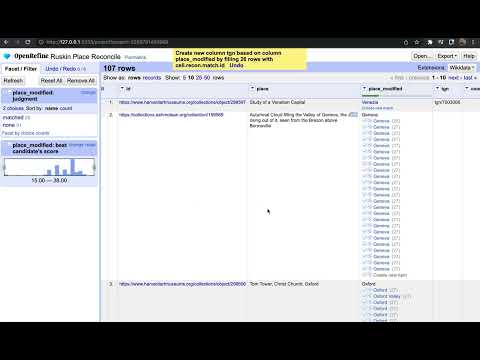

In [33]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Add Entity Identifier Column</h4>"))

YouTubeVideo('PNPhs_7MQ6o', width=1024, height=576)


### Manual Reconciliation

Some additional manual reconciliation was required using the TGN search form.
    
<img width="800px" src="docs/media/img/tgn.png"/>

#### Further Reading
- TGN search form  http://www.getty.edu/research/tools/vocabularies/tgn
    

### Result - CSV file with TGN Identifiers

The result of the reconciliation process is a new column with TGN name authority identifiers for place names identified in the artwork title. 

A CSV file is created with the following steps:
- export CSV file from OpenRefine
- save as [data/ruskin/ruskin-places-rec.csv](data/ruskin/ruskin-places-rec.csv) `

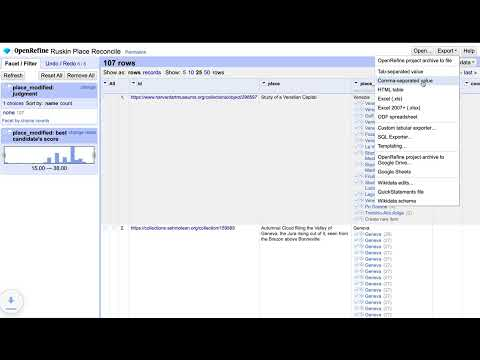

In [34]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Export Results as CSV</h4>"))

YouTubeVideo('0tBjqr5AEmA', width=1024, height=576)

#### Remove rows without TGN identifier

- A final step removes rows that do not have a TGN identifier.
- The resulting dataset is shown in tabular format below.

In [35]:
reconciledRuskinPlaces = "data/ruskin/ruskin-places-rec.csv" 

# read file  into pandas dataframe
df = pd.read_csv(reconciledRuskinPlaces,low_memory=False)

# remove rows that have an empty tgn field value
df = df[df.tgn != ""]

# write dataframe to file 
df.to_csv(reconciledRuskinPlaces, index=False) 

# for illustration display dataframe

display(df)

,id,place,...,tgn,coords
0,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7018159,NaN
1,https://www.harvardartmuseums.org/collections/...,"Tom Tower, Christ Church, Oxford",...,tgn/7011931,NaN
2,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7018159,NaN
3,https://www.tate.org.uk/art/artworks/13033,View of Bologna,...,tgn/7003127,NaN
4,https://www.harvardartmuseums.org/collections/...,Fragment of the Alps,...,tgn/7007746,NaN
5,https://www.harvardartmuseums.org/collections/...,Looking down from Florence towards Lucca,...,tgn/7003165,NaN
6,https://collections.ashmolean.org/collection/1...,Study of a Lion Cub from Nicola Pisano's Siena...,...,tgn/7003168,NaN
7,https://www.harvardartmuseums.org/collections/...,"Entrance to Feldkirch, the Vorarlberg",...,tgn/7018001,NaN
8,https://collections.ashmolean.org/collection//...,End of the Lake of Lecco,...,tgn/1117004,NaN
9,https://collections.ashmolean.org/collection/1...,The Tower of Gloucester Cathedral,...,tgn/7011128,NaN


### Add Geographical Coordinates to CSV file
The next step is to associate geographical coordinates with the Linked Art artwork representations, using the TGN identifiers to query the TGN web service and return geographical coordinates.

Steps:
- request JSON file from http://vocab.getty.edu/tgn/ using TGN identifier
- extract geocoordinates from response
- add geocoordinates to CSV file

In [36]:
import requests

latprop = "http://www.w3.org/2003/01/geo/wgs84_pos#lat"
lngprop = "http://www.w3.org/2003/01/geo/wgs84_pos#long"


display(HTML("<H2>Geographical coordinates retrieved from TGN web service</H2>"))   

reconciledRuskinPlaces = "./data/ruskin/ruskin-places-rec.csv" 
reconciledRuskinPlacesCoords = "./data/ruskin/ruskin-places-rec-coords.csv" 

# create dataframe from CSV file containing reconciled data including TGN identifiers
dataFrameRuskinPlaces = pd.read_csv(reconciledRuskinPlaces,low_memory=False)

# set type for column 'coords'  as string in dataframe
dataFrameRuskinPlaces['coords'] = dataFrameRuskinPlaces['coords'].astype(str)


display(HTML("<p>Retrieving geocoordinates from vocab.getty.edu TGN API. Please wait for task to complete.</p>"))

# create dataframe to hold geographical coordinates with columns tng and latlng
dataFrameGeo = pd.DataFrame({}, columns=['tgn', 'latlng'])

# iterate through reconciled data containing place names and TGN identifiers
for identifier_tgn in dataFrameRuskinPlaces['tgn'].unique():
    
    # print . to indicate progress
    print(".", end='')
    
    #create query string for web service - get tgn id using .split()
    query = "http://vocab.getty.edu/tgn/" + identifier_tgn.split("tgn/",1)[1] +"-place.json"
    
    # use requests.get() to query TGN web service using TGN identifier to return geo coordinates 
    resultsJSON = requests.get(query).json()
    
    # get lat lng from web service query results
    for record in  resultsJSON:
        lat =  resultsJSON[record][latprop][0]["value"]
        lng =  resultsJSON[record][lngprop][0]["value"]
        
        # create string for lat lng
        latlng = str(lat) + "," + str(lng)
        
       
        # append TGN identifier and lat lng to the dataFrameGeo 
        dataFrameGeo = dataFrameGeo.append(
            {
                 'tgn': identifier_tgn, 
                 'latlng': latlng
            }, 
            ignore_index=True)
        

# for illustration display dataFrameGeo with addition of geo coords
display(dataFrameGeo)

,tgn,latlng
0,tgn/7018159,"45.438611,12.326667"
1,tgn/7011931,"51.75,-1.25"
2,tgn/7003127,"44.466667,11.433333"
3,tgn/7007746,"46.416667,10"
4,tgn/7003165,"44.033333,10.45"
5,tgn/7003168,"43.216667,11.4"
6,tgn/7018001,"47.25,9.9167"
7,tgn/1117004,"45.916667,9.316667"
8,tgn/7011128,"51.833333,-2.25"
9,tgn/7010587,"50.106602,1.832691"


### Update CSV File with Geographical Coordinates 

The following code 
- merges `dataFrameRuskinPlaces` with `dataFrameGeo` containing the geocoordinates.
- removes `coords` from `dataFrameRuskinPlaces` 
- renames `latlng` to `coords` in `dataFrameRuskinPlaces` 
- writes `dataFrameRuskinPlaces` to a CSV file

In [14]:
reconciledRuskinPlacesCoords = "./data/ruskin/ruskin-places-rec-coords.csv" 


# merge dataframe with coords with dataframe from csv
dataFrameRuskinPlaces = dataFrameRuskinPlaces.merge(dataFrameGeo, on='tgn') 

# drop column coords
dataFrameRuskinPlaces = dataFrameRuskinPlaces.drop('coords', 1) # drop column coords

# rename column latlng to coords
dataFrameRuskinPlaces.rename(columns={'latlng': 'coords'}, inplace=True) # rename column tgn to coords

# drop rows that have na value in coords column
dataFrameRuskinPlaces.dropna(subset=['coords'])  

# write to CSV file
dataFrameRuskinPlaces.to_csv(reconciledRuskinPlacesCoords, index=False)

display(HTML("<H4>CSV file with Geographical Coordinates</H4>"))
# display dataframe
display(dataFrameRuskinPlaces)


,id,place,...,tgn,coords
0,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7018159,"45.438611,12.326667"
1,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7018159,"45.438611,12.326667"
2,https://collections.ashmolean.org/collection/1...,Part of the Base of a Pilaster in Santa Maria ...,...,tgn/7018159,"45.438611,12.326667"
3,https://www.tate.org.uk/art/artworks/13032,The North-West Angle of the Facade of St Mark’...,...,tgn/7018159,"45.438611,12.326667"
4,https://collections.ashmolean.org/collection/1...,"The Palazzo Contarini-Fasan, Venice",...,tgn/7018159,"45.438611,12.326667"
5,https://www.harvardartmuseums.org/collections/...,Studies in St. Mark's,...,tgn/7018159,"45.438611,12.326667"
6,https://www.harvardartmuseums.org/collections/...,"Fragments from Abbeville, Lucca, Venice, and Pisa",...,tgn/7018159,"45.438611,12.326667"
7,https://collections.ashmolean.org/collection/1...,"Part of the Palazzo Priuli, Venice",...,tgn/7018159,"45.438611,12.326667"
8,https://www.harvardartmuseums.org/collections/...,"Architectural Sketch, Venice",...,tgn/7018159,"45.438611,12.326667"
9,https://collections.ashmolean.org/collection/1...,View from the Palazzo Bembo to the Palazzo Gri...,...,tgn/7018159,"45.438611,12.326667"


##  4. Define Geolocation Representation in Linked Art

The next step is to define a representation in Linked Art for geographical coordinates of place depicted in artwork. The relevant parts of the Linked Art model are: 
 - Depiction
 - Geospatial approximation
 - Depiction of place with approximate location


### Linked Art Data Model - Depiction

From https://linked.art/model/object/aboutness/#depiction

<blockquote>Many sorts of artwork depict things that can be pointed out in the artwork. These could be identifiable entities, such as a known Person or Object with a name or identifier, or unidentifiable (perhaps fictional) instances of a class of entity, such as a depiction of a battle but not any particular battle. For example a portrait depicts the person sitting for it, or a sketch of a generic landscape depicts a place even if it's not a particular, known location. The depiction pattern describes what is in the artwork's image.</blockquote>

<blockquote>This is modeled using the `represents` property on the VisualItem, which refers to the entity that is being depicted.</blockquote>


The following representation will be used for place depicted in Ruskin's artworks:


`{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "https://linked.art/example/object/34",
  "type": "HumanMadeObject",
  "_label": "artwork title including place name",
    "shows": [
    {
      "type": "VisualItem",
      "represents": [
        {
          "type": "Place",
          "_label": "place name"
        }
      ]
    }
  ]}`


### Linked Art Data Model - Geospatial Approximation

The Linked Art data model describes how to represent geospatial approximation.

From https://linked.art/model/place/#geospatial-approximation

<blockquote>All recorded locations are approximate to some degree. It may be desirable to capture this approximation separately from the actual place, especially when that approximation is very uncertain. Especially if the place is the exact location of several events, and perhaps an address or other information is known, but not the exact geospatial coordinates.</blockquote>
    

<blockquote>Secondly, as a place is defined by exactly one definition, but there might be multiple approximations such as a polygon as well as the central point, the real place that an activity occured at can be related to multiple approximate places to capture these different approximations.</blockquote>


Example Linked Art representation of geospatial approximation:

`{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "https://linked.art/example/place/4",
  "type": "Place",
  "_label": "True Auction House Location",
  "approximated_by": [
    {
      "type": "Place",
      "_label": "Auction House Location Approximation",
      "defined_by": "POINT(-0.0032937526703165 51.515107154846)"
    }
  ]
}`


### Linked Art Data Model - Depiction of Place with Approximate Location

Relating the Linked Art model for geospatial approximation  to the depiction of places in Ruskin's works, the following representation has been created:


`{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "https://linked.art/example/object/34",
  "type": "HumanMadeObject",
  "_label": "artwork title including place name",
    "shows": [
    {
      "type": "VisualItem",
      "represents": [
        {
          "type": "Place",
          "_label": "Lucca",
          "approximated_by": [
                {
                  "type": "Place",
                  "_label": "Lucca - Location Approximation",
                  "defined_by": "POINT(-0.0032937526703165 51.515107154846)"
                }
              ]
        }
      ]
    }
  ]}`




#### Further reading

- Depiction https://linked.art/model/object/aboutness/#depiction

- Geospatial approximation https://linked.art/model/place/#geospatial-approximation

<h3>Visualisation - Geographical Coordinates of Place Depicted in Artwork</h3>
<p>Below is a visualisation of the Linked Art JSON-LD representation of geographical coordinates of a place depicted in an artwork. 
    
Further information
- explore the representation by clicking on nodes
- SVG representation 
- uses 
   - D3.js
   - is a modified version of code available in the JSON-LD Playground codebase


#### Further Reading

- d3.js  https://d3js.org/
- jsonld-vis https://github.com/science-periodicals/jsonld-vis
- jsonld playground  https://json-ld.org/playground and https://json-ld.org/playground/jsonld-vis.js 


<div id='vis' style='height:100%;width:6000px'></div>

In [15]:
from IPython.core.display import Javascript

code2 = "var file = './data/examples/geolocation.json';"\
        "var selector = '#vis';" \
        "visjsonld(file, selector); "  

with open('./src/js/visld.js', 'r') as _jscript:
    code = _jscript.read() + code2

Javascript(code)

<IPython.core.display.Javascript object>

##  5. Add Place Name and Coordinates into Linked Art JSON-LD Files

The final step is to add place names and geocoordinates to the original Linked Art files. 

The updated Linked Art files, including the geocoordinates, will later be used in a storymap visualisation of the artworks of John Ruskin, mapping the artworks to the locations that they depict, using the geocoordinates.

The `cromulent` Python library is used to create the JSON-LD representation.

In [16]:
try:
    import cromulent 
except:
    %pip install cromulent
    import cromulent
    
from cromulent.model import factory

from cromulent.model import factory, Actor, Production, BeginningOfExistence, EndOfExistence, TimeSpan, Place
from cromulent.model import InformationObject, Phase, VisualItem 
from cromulent.vocab import Painting, Drawing,Miniature,add_art_setter, PrimaryName, Name, CollectionSet, instances, Sculpture 
from cromulent.vocab import aat_culture_mapping, AccessionNumber, Height, Width, SupportPart, Gallery, MuseumPlace 
from cromulent.vocab import BottomPart, Description, RightsStatement, MuseumOrg, Purchase
from cromulent.vocab import Furniture, Mosaic, Photograph, Coin, Vessel, Graphic, Enamel, Embroidery, PhotographPrint
from cromulent.vocab import PhotographAlbum, PhotographBook, PhotographColor, PhotographBW, Negative, Map, Clothing, Furniture
from cromulent.vocab import Sample, Architecture, Armor, Book, DecArts, Implement, Jewelry, Manuscript, SiteInstallation, Text, Print
from cromulent.vocab import TimeBasedMedia, Page, Folio, Folder, Box, Envelope, Binder, Case, FlatfileCabinet
from cromulent.vocab import HumanMadeObject,Tapestry,LocalNumber
from cromulent.vocab import Type,Set
from cromulent.vocab import TimeSpan, Actor, Group, Acquisition, Place
from cromulent.vocab import Production, TimeSpan, Actor
from cromulent.vocab import LinguisticObject,DigitalObject, DigitalService
from cromulent import reader

try:
    import pandas as pd
except:
    %pip install pandas
    import pandas as pd
    
try:
    import os
except:
    %pip install os
    import os
    
try:
    import json
except:
    %pip install json
    import json 
    
artwork = {}
cnt=1

# directory that will contain updated Ruskin artwork representations including geo coords
storyvisdir = "data/ruskin/storyvis/json"

# file containing reconciled data with coordinates
filecoord = "./data/ruskin/ruskin-places-rec-coords.csv" 
# open file containing reconciled data with geo coordinates
dataframeGeo = pd.read_csv(filecoord,low_memory=False)


# directory containing Rusking artworks represented in Linked Art JSON-LD
ruskindir = "data/ruskin/output/json"
file_list=os.listdir(ruskindir)

# for each linked art json file
for file in file_list:
    # open file
    with open( ruskindir + "/" + file) as json_file:
        
        # get json object from file object with json.load() https://www.geeksforgeeks.org/json-load-in-python/
        artwork = json.load(json_file)
        
        # if id field is in the id field of data file containing geographical coordinates, add update the file
        if artwork["id"] in dataframeGeo["id"].tolist():
            
            display(HTML("<h4>" + artwork["_label"] + "</h4>"))
            # get rows in dataframeGeo where id == artwork id from JSON-LD file
            # Access a group of rows and columns by label(s) or a boolean array
            # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
            rows = dataframeGeo.loc[dataframeGeo['id'] == artwork["id"]]
            
            print("Matching row in geographical coordinates file for artwork")
            display(rows)
            
            # get first row https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
            row=rows.iloc[0]
            
         
            
            # get place name and coords from geocoords file 
            placeName = row["place"]
            coords = row["coords"]
            # replace comma in coords with space
            coords = coords.replace(",", " ")
           
            # increment counter
            cnt = cnt+1
             
            # use cromulent to create Linked Art representation of place depicted
             # https://github.com/thegetty/crom
            
            approx_place = Place()
            approx_place._label = placeName
            approx_place.defined_by = "POINT(" + coords + ")"
            
            place = Place()
            place._label = placeName
            place.approximated_by = approx_place
            
            visualItem = VisualItem()
            visualItem.represents = place
            
            # append new representation to artwork json object
            artwork["shows"] = factory.toJSON(visualItem)
            
            print("Geographical coordinates representation to be added:")
            print(json.dumps(factory.toJSON(visualItem), indent=2))
            
            # open output file 
            text_file = open(storyvisdir + "/" + str(cnt) + ".json", "wt")
            
            # write to file and close
            n = text_file.write(json.dumps(artwork,indent=2))
            text_file.close()
            print("File updated" )

HTML("<h4>Files updated</h4>")

,id,place,...,tgn,coords
0,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
20,https://www.harvardartmuseums.org/collections/...,"Tom Tower, Christ Church, Oxford",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
1,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
32,https://www.tate.org.uk/art/artworks/13033,View of Bologna,...,tgn/7003127,"44.466667,11.433333"


,id,place,...,tgn,coords
33,https://www.harvardartmuseums.org/collections/...,Fragment of the Alps,...,tgn/7007746,"46.416667,10"


,id,place,...,tgn,coords
38,https://www.harvardartmuseums.org/collections/...,Looking down from Florence towards Lucca,...,tgn/7003165,"44.033333,10.45"


,id,place,...,tgn,coords
42,https://collections.ashmolean.org/collection/1...,Study of a Lion Cub from Nicola Pisano's Siena...,...,tgn/7003168,"43.216667,11.4"


,id,place,...,tgn,coords
46,https://www.harvardartmuseums.org/collections/...,"Entrance to Feldkirch, the Vorarlberg",...,tgn/7018001,"47.25,9.9167"


,id,place,...,tgn,coords
47,https://collections.ashmolean.org/collection//...,End of the Lake of Lecco,...,tgn/1117004,"45.916667,9.316667"


,id,place,...,tgn,coords
48,https://collections.ashmolean.org/collection/1...,The Tower of Gloucester Cathedral,...,tgn/7011128,"51.833333,-2.25"


,id,place,...,tgn,coords
49,https://collections.ashmolean.org/collection/1...,The Courtyard of a Late Gothic Wooden House at...,...,tgn/7010587,"50.106602,1.832691"


,id,place,...,tgn,coords
55,https://www.harvardartmuseums.org/collections/...,Falls of Schaffhausen,...,tgn/7106738,"48.966667,10.566667"


,id,place,...,tgn,coords
58,https://www.harvardartmuseums.org/collections/...,Towers at Baden,...,tgn/8707496,"47.452702,8.309969"


,id,place,...,tgn,coords
50,https://www.harvardartmuseums.org/collections/...,"Church of St. Wulfran, Abbeville",...,tgn/7010587,"50.106602,1.832691"


,id,place,...,tgn,coords
56,https://www.harvardartmuseums.org/collections/...,Falls of Schaffhausen,...,tgn/7106738,"48.966667,10.566667"


,id,place,...,tgn,coords
59,https://www.harvardartmuseums.org/collections/...,Bellinzona,...,tgn/7007318,"46.194902,9.024729"


,id,place,...,tgn,coords
2,https://collections.ashmolean.org/collection/1...,Part of the Base of a Pilaster in Santa Maria ...,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
60,https://collections.ashmolean.org/collection//...,"Bellagio, Lago di Como",...,tgn/7006070,"46,9.283333"


,id,place,...,tgn,coords
43,https://collections.ashmolean.org/collection/1...,Sketch of Lioness and Cubs from Nicola Pisano'...,...,tgn/7003168,"43.216667,11.4"


,id,place,...,tgn,coords
61,https://www.harvardartmuseums.org/collections/...,View of Chamonix,...,tgn/1032562,"45.924308,6.867316"


,id,place,...,tgn,coords
3,https://www.tate.org.uk/art/artworks/13032,The North-West Angle of the Facade of St Mark’...,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
62,https://collections.ashmolean.org/collection/1...,The Kapellbrücke at Luzern (Lucerne),...,tgn/7007280,"47.083333,8.266667"


,id,place,...,tgn,coords
64,https://collections.ashmolean.org/collection/1...,Mont Blanc from Saint-Martin-sur-Arve,...,tgn/7617157,"45.356009,6.685511"


,id,place,...,tgn,coords
34,https://collections.ashmolean.org/collection//...,"Bergamo and the Alps, from the road to Brescia",...,tgn/7007746,"46.416667,10"


,id,place,...,tgn,coords
4,https://collections.ashmolean.org/collection/1...,"The Palazzo Contarini-Fasan, Venice",...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
65,https://www.harvardartmuseums.org/collections/...,Pass of Faido,...,tgn/1064047,"46.479417,8.797659"


,id,place,...,tgn,coords
21,https://collections.ashmolean.org/collection/1...,"Sepia Sketch of Leafage, further carried: Stud...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
22,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
69,https://www.harvardartmuseums.org/collections/...,"Convent and Alpine Pass, Visp, Switzerland",...,tgn/8711124,"46.301907,7.870004"


,id,place,...,tgn,coords
66,https://www.harvardartmuseums.org/collections/...,Pass of Faido,...,tgn/1064047,"46.479417,8.797659"


,id,place,...,tgn,coords
23,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
5,https://www.harvardartmuseums.org/collections/...,Studies in St. Mark's,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
39,https://collections.ashmolean.org/collection/1...,Lateral View of the Façade San Michele in Foro...,...,tgn/7003165,"44.033333,10.45"


,id,place,...,tgn,coords
40,https://collections.ashmolean.org/collection/1...,Part of the Façade of the destroyed Church of ...,...,tgn/7003165,"44.033333,10.45"


,id,place,...,tgn,coords
51,https://collections.ashmolean.org/collection/1...,Old houses at Abbeville,...,tgn/7010587,"50.106602,1.832691"


,id,place,...,tgn,coords
6,https://www.harvardartmuseums.org/collections/...,"Fragments from Abbeville, Lucca, Venice, and Pisa",...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
70,https://www.harvardartmuseums.org/collections/...,Lake of Zug,...,tgn/1118823,"47.131301,8.483347"


,id,place,...,tgn,coords
67,https://www.harvardartmuseums.org/collections/...,The Pass of Faido,...,tgn/1064047,"46.479417,8.797659"


,id,place,...,tgn,coords
24,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
73,https://collections.ashmolean.org/collection/1...,"Basle (Basel), with Outline of the Mountains o...",...,tgn/7007269,"47.558395,7.573271"


,id,place,...,tgn,coords
71,https://www.harvardartmuseums.org/collections/...,Lake of Zug,...,tgn/1118823,"47.131301,8.483347"


,id,place,...,tgn,coords
25,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
7,https://collections.ashmolean.org/collection/1...,"Part of the Palazzo Priuli, Venice",...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
8,https://www.harvardartmuseums.org/collections/...,"Architectural Sketch, Venice",...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
74,https://www.harvardartmuseums.org/collections/...,Study of Pines at Sestri,...,tgn/7034720,"44.269444,9.384722"


,id,place,...,tgn,coords
44,https://collections.ashmolean.org/collection/1...,A Spandrel at Siena,...,tgn/7003168,"43.216667,11.4"


,id,place,...,tgn,coords
35,https://collections.ashmolean.org/collection/1...,"The Brezon and Alps of the Reposoir, seen from...",...,tgn/7007746,"46.416667,10"


,id,place,...,tgn,coords
9,https://collections.ashmolean.org/collection/1...,View from the Palazzo Bembo to the Palazzo Gri...,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
76,http://www.rijksmuseum.nl/nl/collectie/nl-RP-T...,Bergkam aan het Meer van Genève,...,tgn/7003746,"46.196732,6.110443"


,id,place,...,tgn,coords
68,https://collections.ashmolean.org/collection/1...,Study in Neutral Tint of Turner's 'The Pass of...,...,tgn/1064047,"46.479417,8.797659"


,id,place,...,tgn,coords
77,https://www.harvardartmuseums.org/collections/...,Dawn at Neuchâtel,...,tgn/7003751,"46.990867,6.797675"


,id,place,...,tgn,coords
41,https://collections.ashmolean.org/collection/1...,Part of the Façade of the destroyed Church of ...,...,tgn/7003165,"44.033333,10.45"


,id,place,...,tgn,coords
10,https://www.harvardartmuseums.org/collections/...,Architectural Study: Three Sections of a Venet...,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
79,https://www.harvardartmuseums.org/collections/...,"Hôtel de Ville, Aix-la-Chapelle",...,tgn/7004799,"50.770833,6.105278"


,id,place,...,tgn,coords
45,https://collections.ashmolean.org/collection/1...,"A Window of the Palazzo Tolomei, Siena, showin...",...,tgn/7003168,"43.216667,11.4"


,id,place,...,tgn,coords
36,https://collections.ashmolean.org/collection/1...,Three Studies of Narcissus ('Field Narcissus o...,...,tgn/7007746,"46.416667,10"


,id,place,...,tgn,coords
26,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
11,https://www.nga.gov/collection/76140,"Ornamental Study with Acanthus Motif for ""The ...",...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
12,https://collections.ashmolean.org/collection/1...,"The Exterior of the Ducal Palace, Venice",...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
72,https://www.harvardartmuseums.org/collections/...,Lake of Zug,...,tgn/1118823,"47.131301,8.483347"


,id,place,...,tgn,coords
13,https://www.harvardartmuseums.org/collections/...,"Boat and Sketches of Two Figures, Venice",...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
80,https://collections.ashmolean.org/collection/1...,Swiss tower at Fribourg,...,tgn/7007278,"46.79572,7.154748"


,id,place,...,tgn,coords
27,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
81,https://collections.ashmolean.org/collection/1...,"Fribourg, Switzerland: Pen sketch",...,tgn/7007278,"46.79572,7.154748"


,id,place,...,tgn,coords
28,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
52,https://collections.ashmolean.org/collection/1...,"Sketch of 'Modes au Premier', Abbeville",...,tgn/7010587,"50.106602,1.832691"


,id,place,...,tgn,coords
63,https://collections.ashmolean.org/collection/1...,View of Luzern from above,...,tgn/7007280,"47.083333,8.266667"


,id,place,...,tgn,coords
29,https://collections.ashmolean.org/collection/1...,"Design for a Window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
75,https://collections.ashmolean.org/collection/1...,"Stone Pines at Sestri, Gulf of Genoa",...,tgn/7034720,"44.269444,9.384722"


,id,place,...,tgn,coords
14,https://www.harvardartmuseums.org/collections/...,Studies of Venetian Capitals,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
83,https://collections.ashmolean.org/collection/1...,Mountain study: view of the Alps (Aiguilles ne...,...,tgn/1031704,"44.781489,6.869433"


,id,place,...,tgn,coords
57,https://www.harvardartmuseums.org/collections/...,Town of Schaffhausen: Castle and Turrets,...,tgn/7106738,"48.966667,10.566667"


,id,place,...,tgn,coords
84,https://www.harvardartmuseums.org/collections/...,Scene on the Rhine,...,tgn/7012611,"51.98404,4.08245"


,id,place,...,tgn,coords
30,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
82,https://www.harvardartmuseums.org/collections/...,Tower of Fribourg,...,tgn/7007278,"46.79572,7.154748"


,id,place,...,tgn,coords
15,https://www.harvardartmuseums.org/collections/...,Venetian Renaissance Capital,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
16,https://www.harvardartmuseums.org/collections/...,Capital from the Lower Arcade of the Doges' Pa...,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
53,https://collections.ashmolean.org/collection/1...,First Process of Sepia Sketch of Leafage: Stud...,...,tgn/7010587,"50.106602,1.832691"


,id,place,...,tgn,coords
85,https://www.harvardartmuseums.org/collections/...,"Study of Portal and Carved Pinnacles, Cathedra...",...,tgn/8711852,"49.133333,.216667"


,id,place,...,tgn,coords
37,https://collections.ashmolean.org/collection/1...,Mountain study: view of the Alps,...,tgn/7007746,"46.416667,10"


,id,place,...,tgn,coords
31,https://collections.ashmolean.org/collection/1...,Ivy-Leaved Toadflax ('Oxford Ivy'),...,tgn/7011931,"51.75,-1.25"


,id,place,...,tgn,coords
54,https://collections.ashmolean.org/collection/1...,"Study for Detail of the Market Place, Abbeville",...,tgn/7010587,"50.106602,1.832691"


,id,place,...,tgn,coords
86,https://collections.ashmolean.org/collection/1...,Evening in Autumn under the Castle of Habsburg,...,tgn/8703166,"47.462441,8.185123"


,id,place,...,tgn,coords
17,https://www.harvardartmuseums.org/collections/...,"Study of an Archivolt in Saint Mark's, Venice",...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
78,https://collections.ashmolean.org/collection/1...,"Afternoon in Spring, with south Wind, at Neuch...",...,tgn/7003751,"46.990867,6.797675"


,id,place,...,tgn,coords
87,https://collections.ashmolean.org/collection/1...,Sketch of the Oak Spray in Mantegna's Fresco o...,...,tgn/7003085,"45.416667,11.883333"


,id,place,...,tgn,coords
18,https://www.harvardartmuseums.org/collections/...,Part of a Sketch of the Northwest Porch of St....,...,tgn/7018159,"45.438611,12.326667"


,id,place,...,tgn,coords
19,https://collections.ashmolean.org/collection/1...,Study of the Marble Inlaying on the Front of t...,...,tgn/7018159,"45.438611,12.326667"


## Example Linked Art JSON-LD including Geographical Identifier and Coordinates 

The following is an example JSON-LD Linked Art representation, updated to include geographical coordinates.
    
### Image Title: Study of the Marble Inlaying on the Front of the Casa Loredan, Venice

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Study_of_the_Marble_Inlaying_on_the_Front_of_the_Casa_Loredan.jpg/508px-Study_of_the_Marble_Inlaying_on_the_Front_of_the_Casa_Loredan.jpg"/>



<a href="http://ruskin.ashmolean.org/collection/8979/object/14491">Ashmolean Museum artwork page</a>


### JSON-LD Representation

In [17]:
print(json.dumps(artwork,indent=2))

{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "https://collections.ashmolean.org/collection/159660",
  "type": "HumanMadeObject",
  "_label": "Study of the Marble Inlaying on the Front of the Casa Loredan, Venice",
  "identified_by": [
    {
      "id": "http://lod.example.org/museum/Identifier/WA.RS.RUD.022",
      "type": "Identifier",
      "classified_as": [
        {
          "id": "http://vocab.getty.edu/aat/300312355",
          "type": "Type",
          "_label": "Accession Number"
        }
      ],
      "content": "WA.RS.RUD.022"
    },
    {
      "id": "http://lod.example.org/museum/Identifier/159660",
      "type": "Identifier",
      "classified_as": [
        {
          "id": "http://vocab.getty.edu/aat/300404621",
          "type": "Type",
          "_label": "Owner-Assigned Number"
        }
      ],
      "content": "159660"
    },
    {
      "id": "https://collections.ashmolean.org/collection/159660/primary-name",
      "type": "Name",
     

<h3>Visualisation -  Artwork Description with Geographical Coordinates of Place Depicted</h3>

If you'd like to view a different file change the value of `file` filepath in the code below (examples: 1.json .. 89.json)

In [18]:
from IPython.core.display import Javascript

code2 = "var file = './data/ruskin/storyvis/json/3.json';"\
        "var selector = '#vis2';" \
        "visjsonld(file, selector); "  

with open('./src/js/visld.js', 'r') as _jscript:
    code = _jscript.read() + code2

Javascript(code)

<IPython.core.display.Javascript object>

<div id='vis2' style='height:100%;width:6000px'></div>

## Next Steps

### Jupyter Notebooks

Look at the Jupyter notebook that:
-  creates the input files
 - <a href="https://github.com/tgra/Linked-Art/blob/main/01-06-Transform-John-Ruskin.ipynb">`01-06-Transform-John-Ruskin`</a>
- creates a StoryMap data visualisation from the updated JSON-LD files
 - <a href="https://github.com/tgra/Linked-Art/blob/main/03-04-Visualise-John-Ruskin-Story-Map.ipynb">`03-04-Visualise-John-Ruskin-Story-Map.ipynb`</a>


## View other Linked Art JSON-LD files from Ruskin dataset

In [49]:
import ipywidgets

from ipywidgets import Layout, FileUpload 
from IPython.display import display, IFrame, HTML, Image



# directory that will contain updated Ruskin artwork representations including geo coords
dir = "data/ruskin/storyvis/json"

file_list=os.listdir(dir)

selectOptions = []
selectOptions.append(("Please select an artwork", ""))


# for each linked art json file
for file in file_list:
    # open file
    with open( dir + "/" + file) as json_file:
        artwork = json.load(json_file)
        title = artwork["_label"] + " (" + file + ")"
        
        selectOptions.append((title,file))
        
from IPython.core.display import Javascript        
    
def dropdown_eventhandler(change):
    with open('./src/js/visld.js', 'r') as _jscript:
        code = _jscript.read() + "var file = './data/ruskin/storyvis/json/" + change.new + "';var selector = '#vis3';visjsonld(file, selector); "
        display(Javascript(code))
    
        with open( dir + "/" + change.new) as json_file:
    
                artwork = json.load(json_file)
                if ("representation" in artwork):
                    image = artwork["representation"][0]["id"]
                    display(Javascript("document.getElementById('artwork').src = '" + image   +   "';"))
                else:
                    display(Javascript("document.getElementById('artwork').src = '';"))
                    
        

In [50]:
selectObject = ipywidgets.Dropdown(options=selectOptions)
selectObject.observe(dropdown_eventhandler, names='value')

display(selectObject)

Dropdown(options=(('Please select an artwork', ''), ("Sketch of Lioness and Cubs from Nicola Pisano's Siena Pu…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div><img style="height:500px" id="artwork" src=""/></div>

<div id='vis3' style='height:100%;width:6000px'></div>